# Introduction
Data Set Information:

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


Attribute Information:

1. **age** -  Age of patient at time of operation (numerical) 
2. **op_year** - Patient's year of operation (year - 1900, numerical) 
3. **ax_nodes** - Number of positive axillary nodes detected (numerical) 
4. **survival_status** - Survival status (class attribute) **1 = the patient survived 5 years or longer  2 = the patient died within 5 year**

More information about the Dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival)

In [8]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# Ignore annoying warnings from seaborn
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Dataset
data = pd.read_csv('haberman.csv', names=['age', 'op_year', 'ax_nodes', 'survival_status'])
data.head()

,age,op_year,ax_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
# The class attribute is categorical so let's convert it to yes/no values.
# yes - survived 5 years or longer.
# no - died within 5 years.
data['survival_status'] = data['survival_status'].map({1:'yes', 2:'no'})

In [4]:
# print information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                306 non-null int64
op_year            306 non-null int64
ax_nodes           306 non-null int64
survival_status    306 non-null object
dtypes: int64(3), object(1)
memory usage: 9.6+ KB


In [5]:
data.describe(include='all')

,age,op_year,ax_nodes,survival_status
count,306.000000,306.000000,306.000000,306
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,yes
freq,NaN,NaN,NaN,225
mean,52.457516,62.852941,4.026144,NaN
std,10.803452,3.249405,7.189654,NaN
min,30.000000,58.000000,0.000000,NaN
25%,44.000000,60.000000,0.000000,NaN
50%,52.000000,63.000000,1.000000,NaN
75%,60.750000,65.750000,4.000000,NaN


In [6]:
data.head()

,age,op_year,ax_nodes,survival_status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


In [7]:
data['survival_status'].value_counts()

yes    225
no      81
Name: survival_status, dtype: int64

In [8]:
data['survival_status'].value_counts(normalize=True)

yes    0.735294
no     0.264706
Name: survival_status, dtype: float64

## Observation
1. The dataset has 306 rows and 4 columns. 
2. It contains no null values.
3. The class attribute has been converted to categorical so that it can be easier to work with.
3. The data has an imbalanced class attribute with almost 73% values as 'yes'.
4. The ax_nodes has a minimum value of 0 and maxium value of 52 with a mean of 4. The median value is 1.
5. All other features have almost identical mean and median values except for ax_nodes.

## Objective
To Determine whether a given patient will survive for more than 5 years after the operation or not.

# Univariate Analysis

In [5]:
data_yes = data[data['survival_status']=='yes']
data_no = data[data['survival_status']=='no']

In [10]:
data_yes.describe()

,age,op_year,ax_nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [11]:
data_no.describe()

,age,op_year,ax_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


## Kernel Density Estimation Plots

In [9]:
def make_kde_plot(data):
    fig, ax = plt.subplots(1,3,figsize=(15,6))
    for i, col in enumerate(['age', 'op_year', 'ax_nodes']):
        g = sns.FacetGrid(data, hue='survival_status', size=5)
        g = g.map(sns.kdeplot,col,ax=ax[i]).add_legend()
        ax[i].set_xlabel(col, fontsize=13)
        ax[i].set_title(col+" kde plot", fontsize=16)
        plt.close()
    fig.tight_layout()       

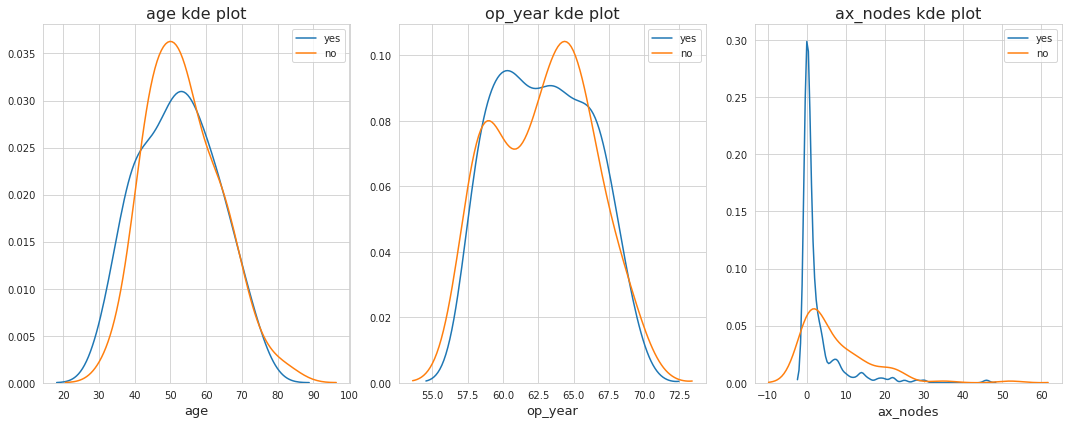

In [10]:
make_kde_plot(data)

## Swarm Plots

In [14]:
def make_swarm_plot(data):
    fig, ax = plt.subplots(1,3,figsize=(15,6))
    for i,col in enumerate(['age', 'op_year', 'ax_nodes']): 
        sns.swarmplot(x='survival_status', y=col, data=data,ax=ax[i])
        ax[i].set_ylabel(col, fontsize=13)
        ax[i].set_xlabel('Survival Status', fontsize=13)
        ax[i].set_title(col+' swarmplot', fontsize=16)
        
    fig.tight_layout()
    plt.show()

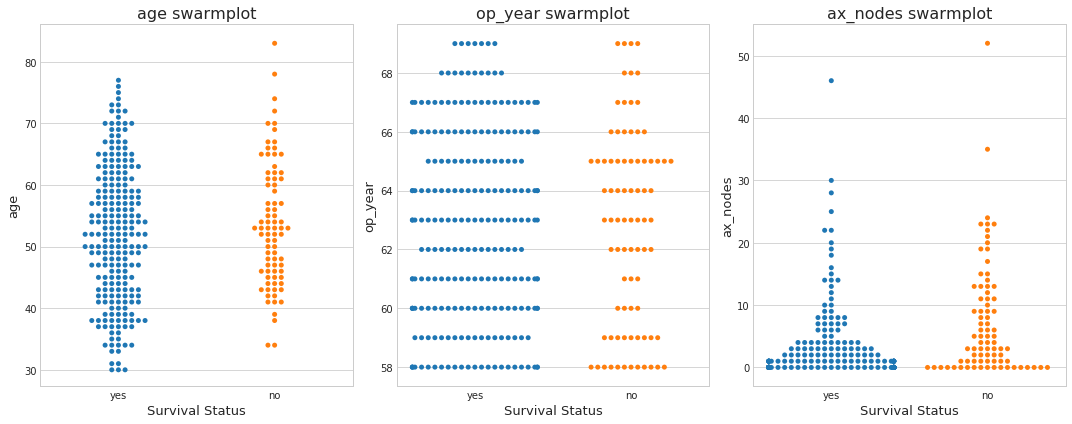

In [15]:
make_swarm_plot(data)

## Probability Density Function And Cumulative Density Function

In [16]:
def make_pdf_cdf(data):
    fig, ax = plt.subplots(1,3,figsize=(15,6), sharey=True)
    for i,col in enumerate(['age', 'op_year', 'ax_nodes']): 
        counts, bin_edges = np.histogram(data[col], bins=10, density=False)
        pdf = counts / sum(counts)
        cdf = np.cumsum(pdf)
        ax[i].plot(bin_edges[1:], pdf, c='red', label='PDF')
        ax[i].plot(bin_edges[1:], cdf, c='blue', label='CDF')
        ax[i].legend(loc='best')
        ax[i].set_xlabel(col, fontsize=13)
        ax[i].set_ylabel('probabilities', fontsize=13)
       
    fig.tight_layout()

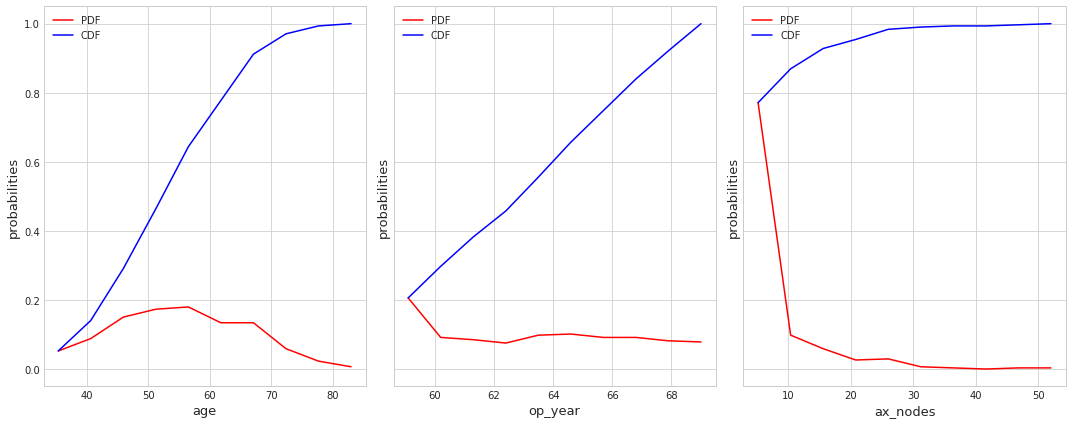

In [17]:
make_pdf_cdf(data)

## Box plots

In [18]:
def make_box_plot(data):
    fig, ax = plt.subplots(1,3,figsize=(15,6))
    for i,col in enumerate(['age', 'op_year', 'ax_nodes']): 
        sns.boxplot(x='survival_status', y=col, data=data,ax=ax[i])
        ax[i].set_ylabel(col, fontsize=13)
        ax[i].set_xlabel('Survival Status', fontsize=13)
        ax[i].set_title(col+' boxplot', fontsize=16)
    fig.tight_layout()

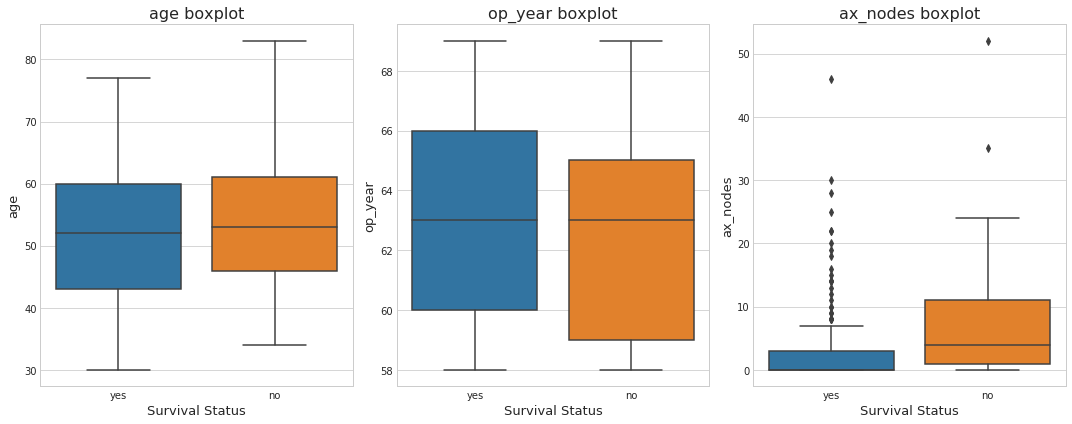

In [19]:
make_box_plot(data)

## Violin Plots

In [20]:
def make_violin_plot(data):
    fig, ax = plt.subplots(1,3,figsize=(15,6))
    for i,col in enumerate(['age', 'op_year', 'ax_nodes']): 
        sns.violinplot(x='survival_status', y=col, data=data,ax=ax[i])
        ax[i].set_ylabel(col, fontsize=13)
        ax[i].set_xlabel('Survival Status', fontsize=13)
        ax[i].set_title(col+' violinplot', fontsize=16)
    fig.tight_layout()

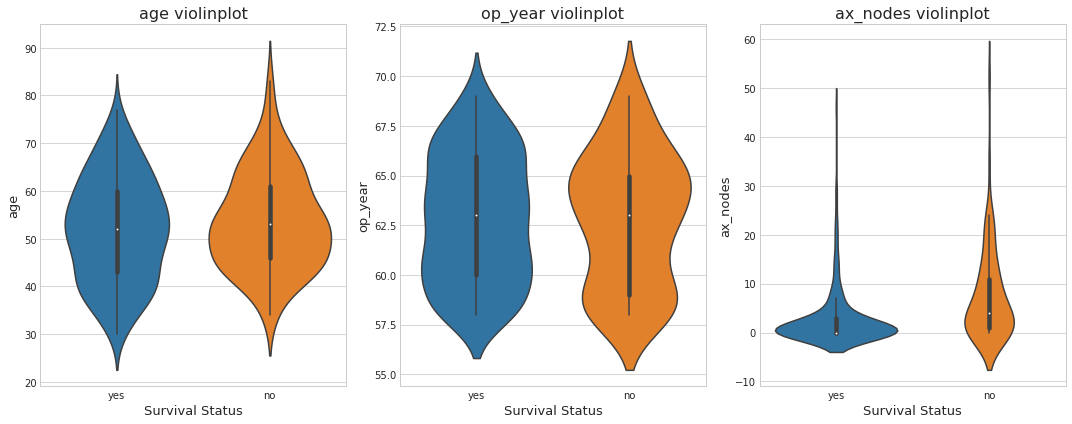

In [21]:
make_violin_plot(data)

### Exploring ax_nodes Statistics

## Observations
1. The distribution of the ax_nodes is highly right skewed in nature as evident by the KDE plot.
2. If a person has 0-4 ax_nodes then his probability of surviving more than 5 years is much greater than the probability of him dying within 5 years. This can also be inferred from the KDE plot.
3. The median ax_nodes count for a person surviving more than 5 years is 0, whereas it is 4 for a person who does not survive.
4. The distribution of the features apart from ax_nodes is somewhat similar and not a lot can be inferred about the survival of a person

## Bivariate Analysis

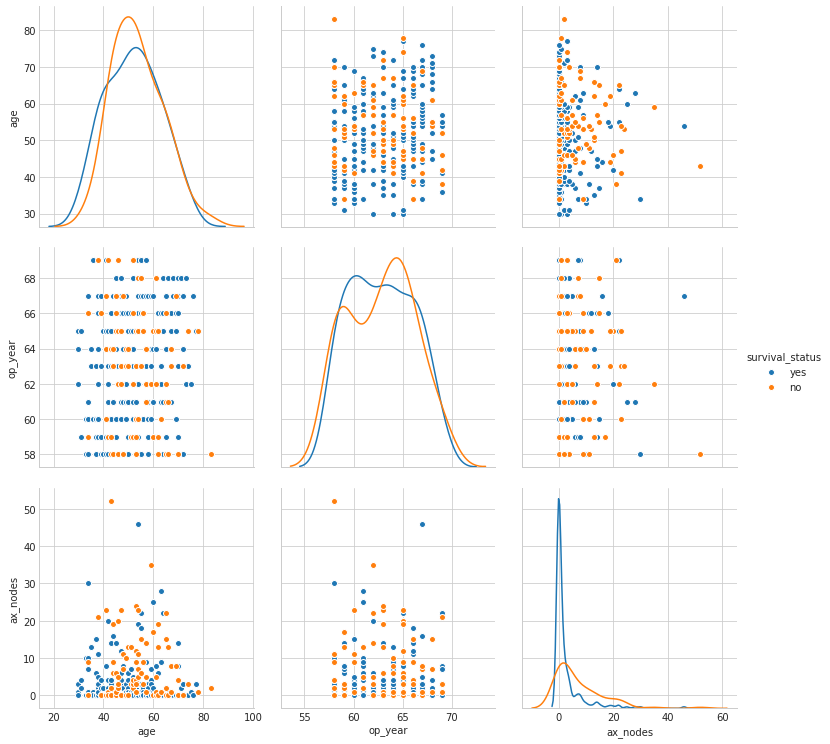

In [22]:
# Pair plot
sns.pairplot(data,hue='survival_status',diag_kind='kde',size=3.5)

No combination of features give a clear picture of the distinction between the survival status